### Lab Evaluation - 4 
### CB.EN.U4CSE20138

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Q1

In [3]:
df = pd.read_csv("advertising.csv")

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,195,196,38.2,3.7,13.8,7.6
196,196,197,94.2,4.9,8.1,9.7
197,197,198,177.0,9.3,6.4,12.8
198,198,199,283.6,42.0,66.2,25.5


In [7]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
TV              0
Radio           0
Newspaper       0
Sales           0
dtype: int64

In [8]:
#scatter plot

Text(0, 0.5, 'Sales')

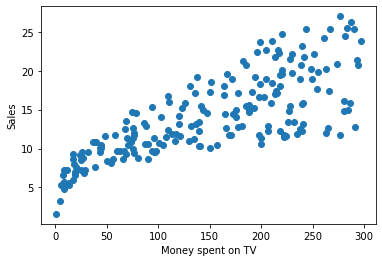

In [12]:
plt.scatter(x="TV",y="Sales",data=df)
plt.xlabel("Money spent on TV")
plt.ylabel("Sales")

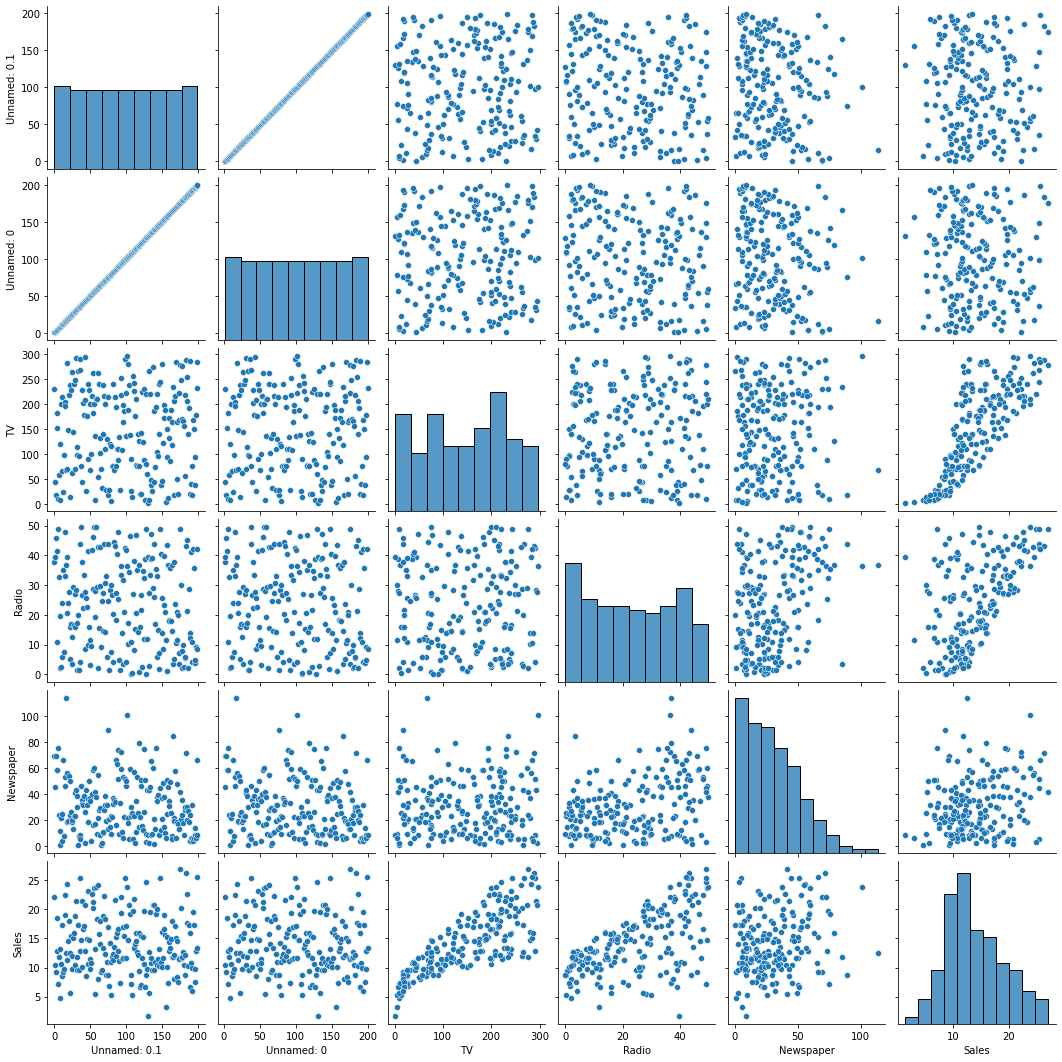

In [13]:
sns.pairplot(df)

<AxesSubplot:>

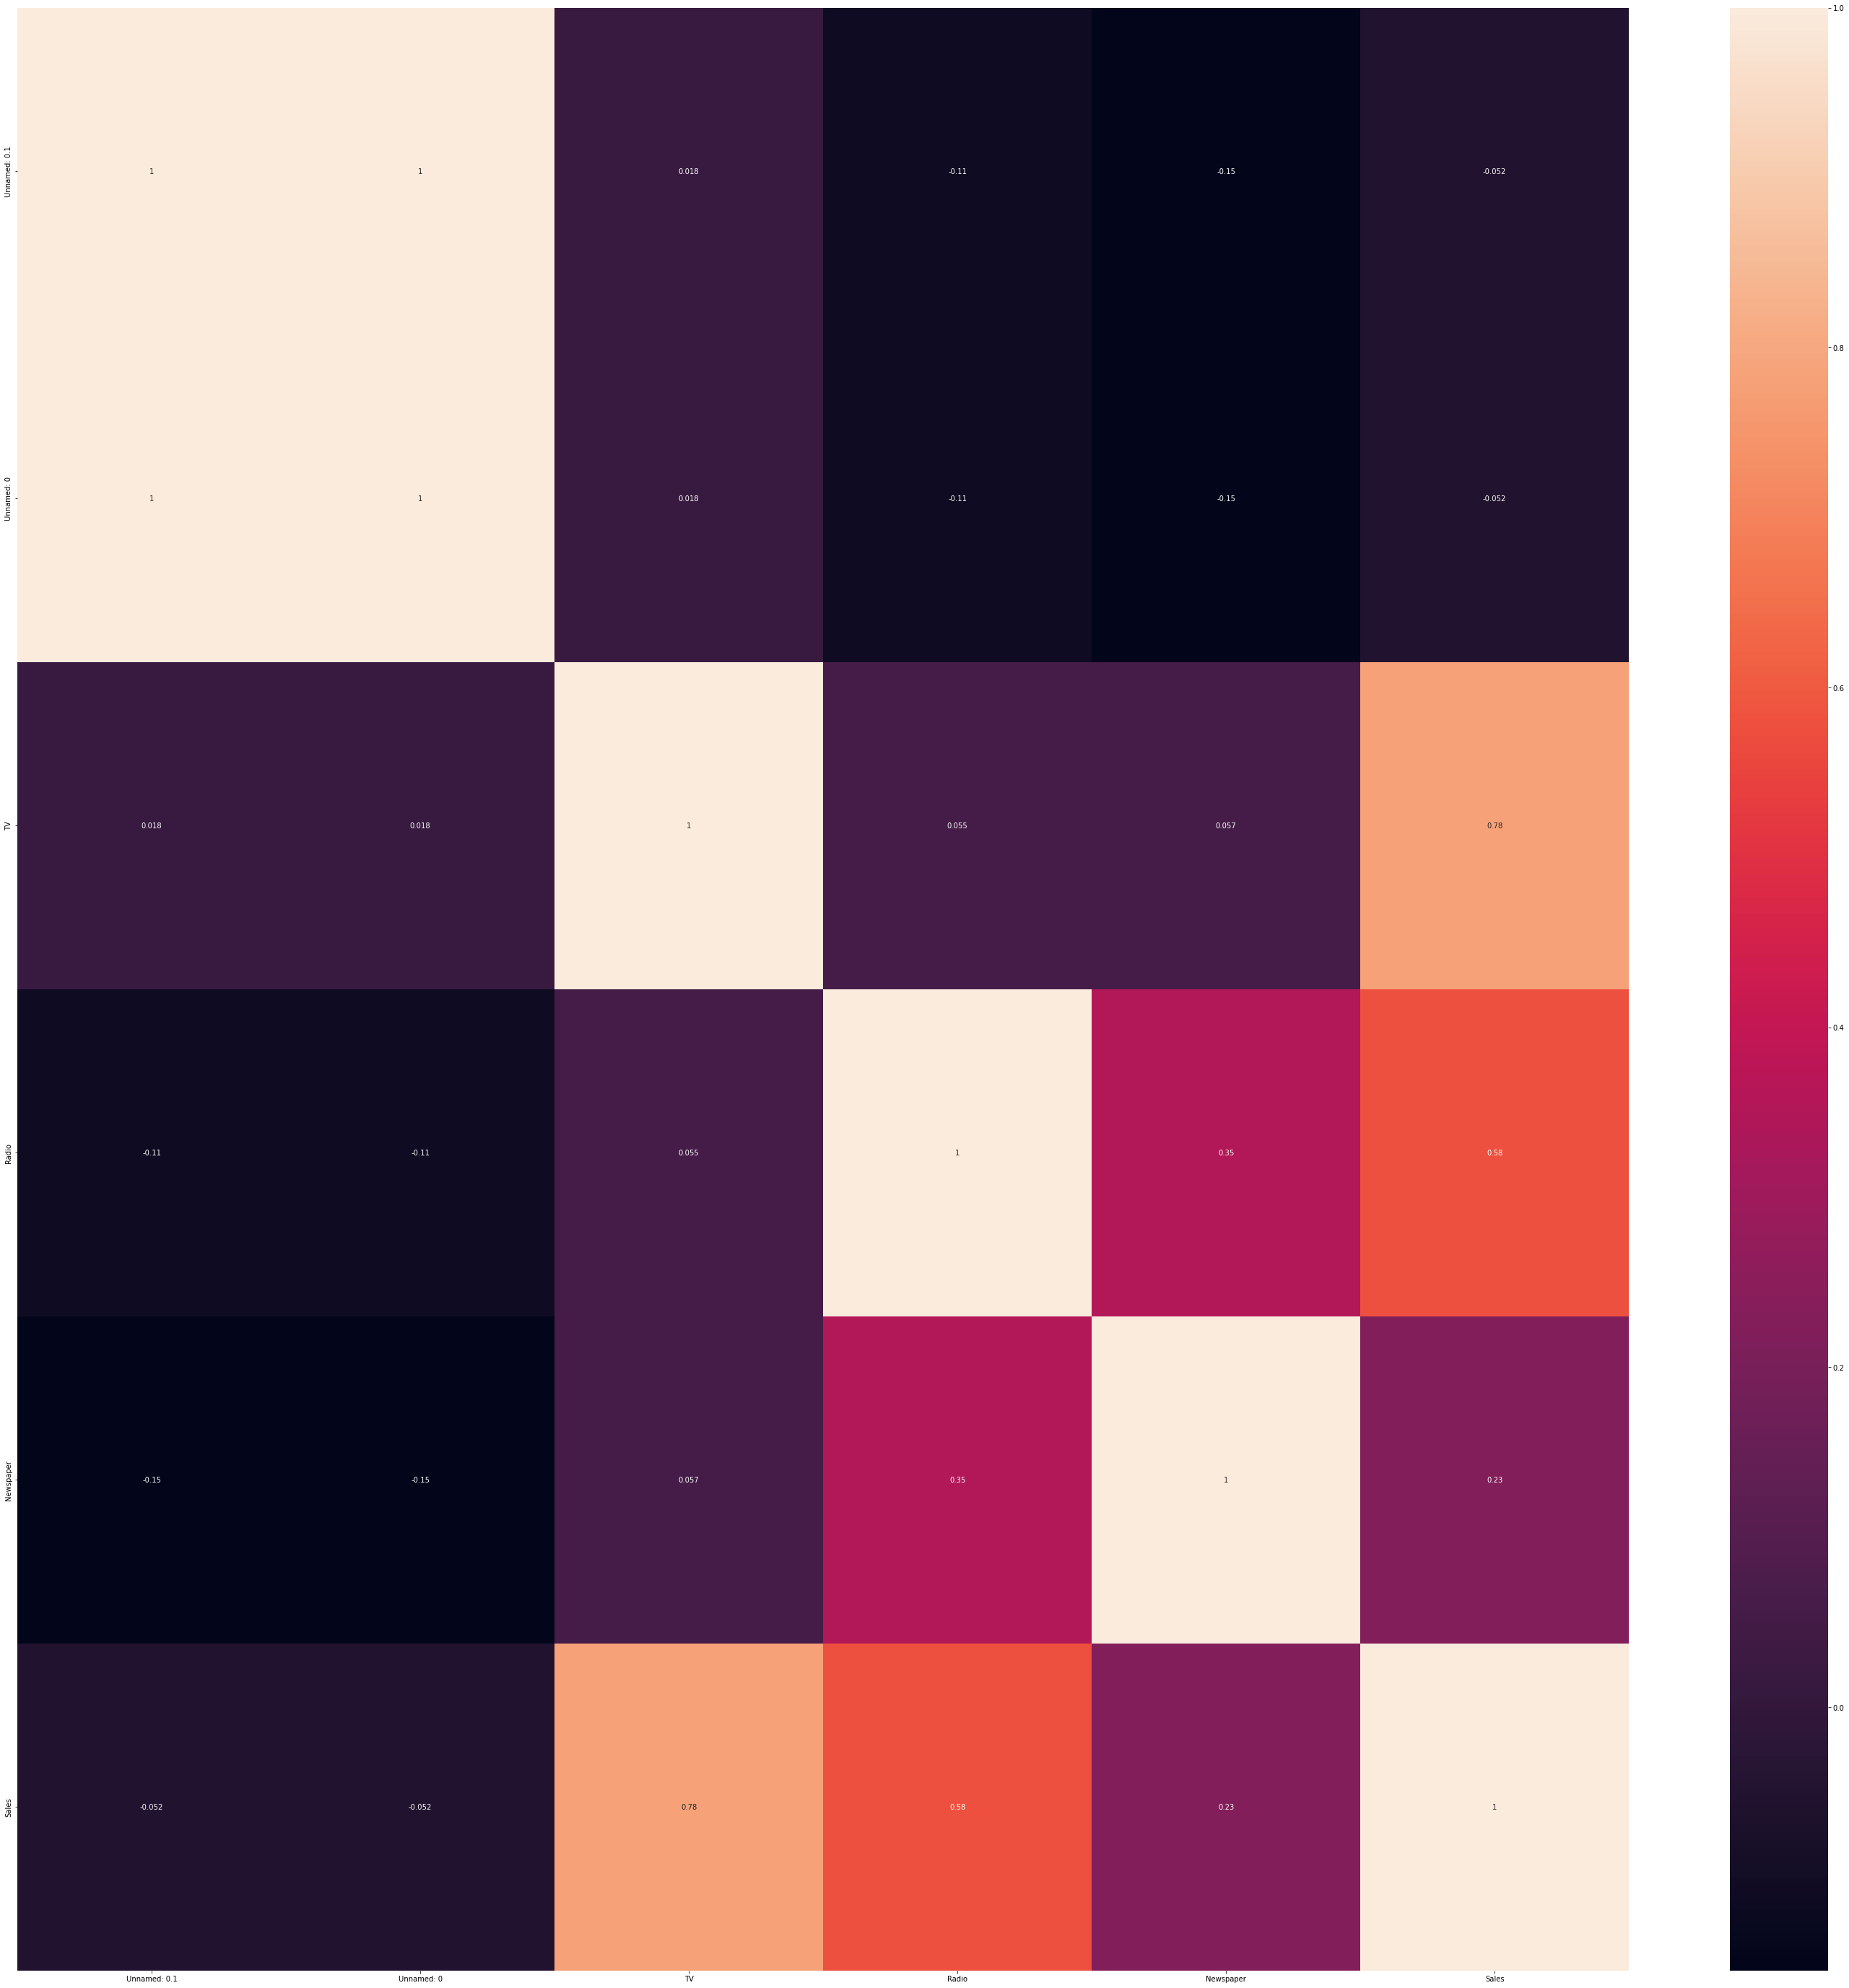

In [72]:
plt.figure(figsize=(50,50))
sns.heatmap(data=df.corr(),annot=True)

In [38]:
x=df.iloc[:,0:-1]

In [39]:
y=df.iloc[:,-1]

In [74]:
# 2 - Linear regression model based on money spent on TV advertisements vs sales
import statsmodels.api as sm
X = df["TV"]
y = df["Sales"]

# We add a constant to the model to allow for the intercept term
X = sm.add_constant(X)

# We fit the model using OLS
model = sm.OLS(y, X).fit()

In [75]:
predictions = model.predict(X)

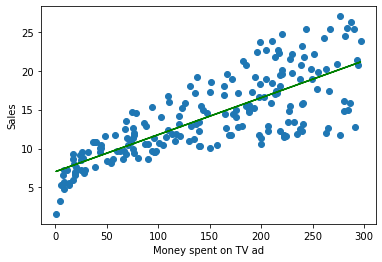

In [77]:
#  4 -  regression line superimposed 
plt.scatter(df["TV"], df["Sales"])
plt.plot(df["TV"], predictions, color="green")
plt.xlabel("Money spent on TV ad")
plt.ylabel("Sales")
plt.show()

In [78]:
#  5 - Use statsmodels.api to run an OLS regressor on the data and plot the line of regression and residuals
model = sm.OLS(y, X)
results = model.fit()

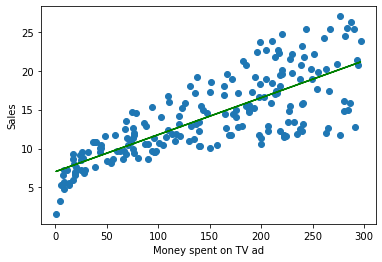

In [80]:
# Plot the line of regression
plt.scatter(df["TV"], df["Sales"])
plt.plot(df["TV"], results.predict(X), color="green")
plt.xlabel("Money spent on TV ad")
plt.ylabel("Sales")
plt.show()

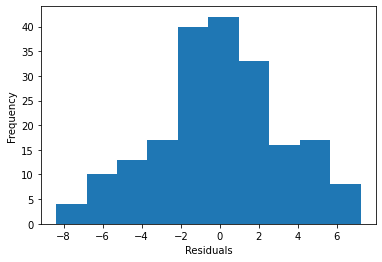

In [81]:
residuals = y - results.predict(X)
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [82]:
#  heteroscedasticity
if abs(residuals).mean() > 0.5:
    print("There may be heteroscedasticity in the data. It is better to investigate further.")
else:
    print("There does not appear to be heteroscedasticity in the data.")

There may be heteroscedasticity in the data. It is better to investigate further.


In [109]:
#linear regression with all features

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scale=StandardScaler()


In [44]:
xscaled=scale.fit_transform(X_train)


In [46]:
xtscaled=scale.fit_transform(X_test)

In [22]:
#Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
model=LinearRegression()

In [50]:
model.fit(xscaled,y_train)

LinearRegression()

In [51]:
y_pred=model.predict(xtscaled)

In [52]:
model.score(xscaled,y_train)

0.8957553000540606

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.8854876091314943

### Q2

In [110]:
df1 = pd.read_csv("pima-indians-diabetes.csv")

In [111]:
df1

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [112]:
df1.iloc[:,8]

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: 1, Length: 767, dtype: int64

In [131]:
X1 = df1.iloc[:,8]
X1

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: 1, Length: 767, dtype: int64

In [126]:
y1 = df1.iloc[:,-1]
y2=y1.to_numpy()
y2.reshape(-1,1)
y11 = pd.DataFrame(y2)
y11

,0
0,0
1,1
2,0
3,1
4,0
...,...
762,0
763,0
764,0
765,1


In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=42)


In [128]:
from sklearn import preprocessing

In [129]:
scale=StandardScaler()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error1= []
error2= []
for k in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))

plt.plot(range(1,20),error1,label="train")
plt.plot(range(1,20),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()



In [116]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd1 = pd.read_csv("pima-indians-diabetes.csv")
pd.options.display.max_columns = None
pd1.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [135]:
pd1.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class']

In [136]:
#1
X = pd1.drop(['Class'], axis='columns')
y =pd1.Class

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [138]:
#2
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [139]:
#3
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

0.7207792207792207

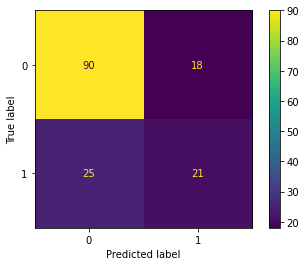

In [140]:
#4
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test, y_pred)

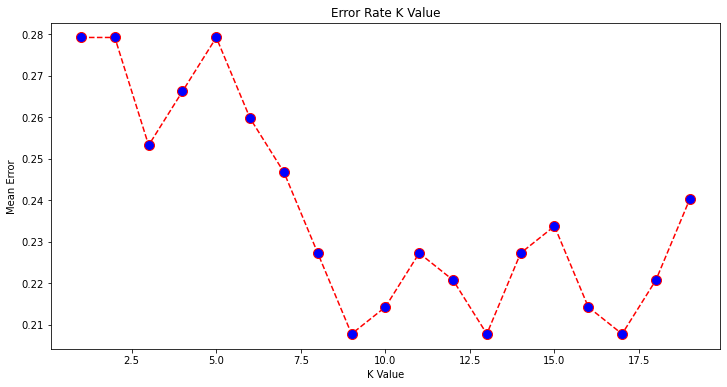

In [141]:
#5

errors = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), errors, color='red', linestyle='dashed', marker='o',
            markerfacecolor='blue', markersize=10)  
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

